### <I>Simulating fBm (fractional Brownian motion) </I>

In [1]:
import numpy as np
import sys, os
from scipy.fft import fft2, fftshift, ifft2, ifftshift
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig_dir = 'figures'
os.makedirs(fig_dir, exist_ok=True)

In [2]:
def generate_fbm_field_2d(shape, H, variance=1.0):

    rows = shape
    cols = shape
    
    # Create 2D White Noise in frequency domain
    # Generate complex Gaussian random numbers with proper scaling
    noise_freq = (np.random.randn(rows, cols) + 1j * np.random.randn(rows, cols)) / np.sqrt(2)

    # Create normalized frequency coordinates
    # Use proper frequency normalization for 2D FFT
    freq_x = np.fft.fftfreq(cols, d=1.0)  # Normalized frequencies [-0.5, 0.5)
    freq_y = np.fft.fftfreq(rows, d=1.0)  # Normalized frequencies [-0.5, 0.5)
    
    # Create 2D grids of frequencies
    kx, ky = np.meshgrid(freq_x, freq_y)
    
    # Calculate magnitude of wave vector (k)
    k_mag = np.sqrt(kx**2 + ky**2)
    
    # Create the power spectrum filter
    # For 2D FBM, the power spectrum is S(k) ~ k^(-(2H+2))
    # So the amplitude filter is k^(-(H+1))
    
    # Handle zero frequency (DC component)
    # Set DC component to zero to ensure zero mean
    filter_freq = np.zeros_like(k_mag)
    nonzero_mask = k_mag > 0
    
    # Apply the power law filter
    filter_freq[nonzero_mask] = k_mag[nonzero_mask]**(-(H + 1))
    
    # Calculate normalization factor
    # This ensures consistent variance across different H values and grid sizes
    norm_factor = np.sqrt(variance * rows * cols / np.sum(filter_freq**2))
    filter_freq *= norm_factor
    
    # Apply the filter: Multiply the noise in frequency domain by the filter
    fbm_field_freq = noise_freq * filter_freq

    # Perform Inverse 2D FFT and take real part
    fbm_field = np.real(ifft2(fbm_field_freq))
    
    # Additional normalization to ensure exact variance (optional)
    actual_var = np.var(fbm_field)
    if actual_var > 0:
        fbm_field *= np.sqrt(variance / actual_var)
    
    return fbm_field

In [3]:
def create_Blue_Red_cmap():

    colors = [
        (0.0, (0.0, 0.05, 0.3)),   # Very dark blue
        (0.3, (0.4, 0.6, 0.9)),    # Light blue
        (0.4, (0.85, 0.9, 0.95)),  # Very light blue
        (0.45, (1.0, 1.0, 1.0)),   # White
        (0.5, (1.0, 1.0, 1.0)),    # White (center point)
        (0.55, (1.0, 1.0, 1.0)),   # White
        (0.6, (0.95, 0.9, 0.85)),  # Very light yellow
        (0.7, (1.0, 0.8, 0.3)),    # Yellow
        (0.85, (0.9, 0.3, 0.1)),   # Orange
        (1.0, (0.4, 0.0, 0.0))     # Very dark red
    ]
    
    return mcolors.LinearSegmentedColormap.from_list('blue_red_displacement', colors)

In [4]:
size = 256  # Size of the 2D field (size x size)
scale_x = 1.0   # Scale for x-direction
scale_y = 1.0   # Scale for y-direction

H_x = 0.8   # Hurst parameter for x-direction
H_y = 0.4   # Hurst parameter for y-direction

# blue to red colormap
cmap = create_Blue_Red_cmap()

# Generate FBM fields with Hurst parameters
dx = generate_fbm_field_2d(size, H_x, variance=0.5) * scale_x   # x-direction fBm field
dy = generate_fbm_field_2d(size, H_y, variance=0.5) * scale_y   # y-direction fBm field

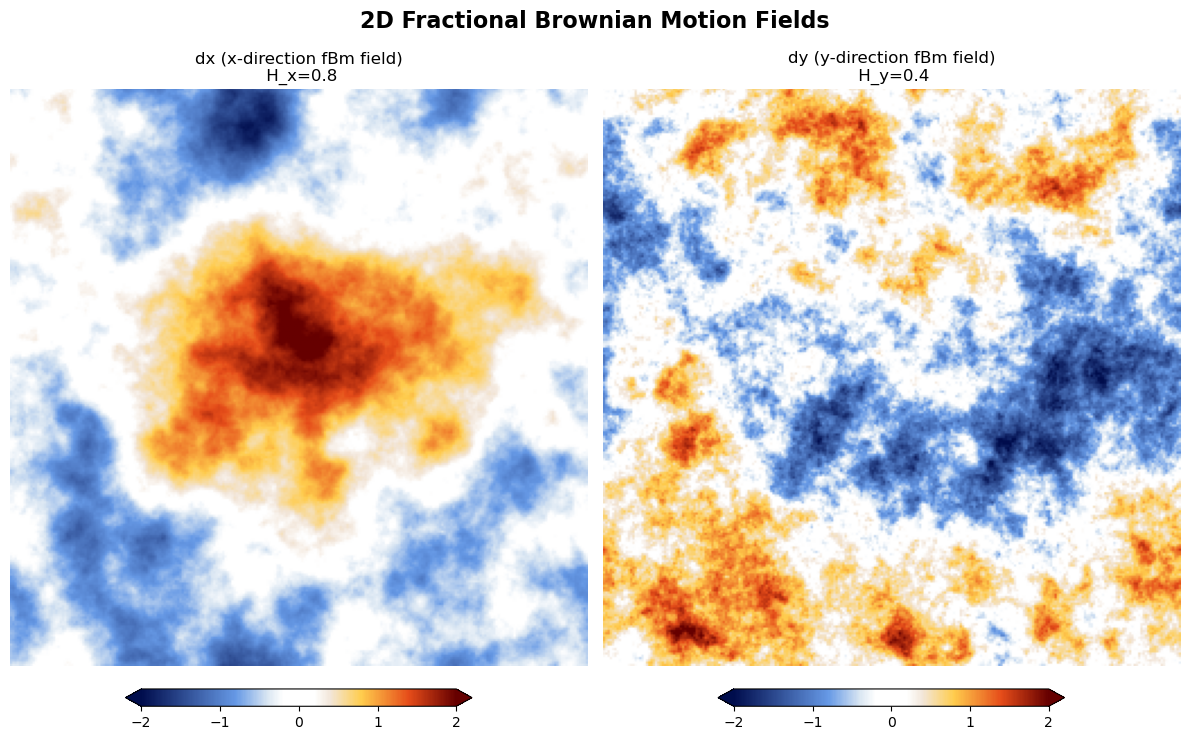

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(dx, cmap=cmap, vmin=-2, vmax=2)
ax[0].axis('off')
ax[0].set_title(f'dx (x-direction fBm field)\n H_x={H_x}')
cbar1 = plt.colorbar(ax[0].images[0], ax=ax[0], orientation='horizontal', shrink=0.6, pad=0.02, extend='both')
ax[1].imshow(dy, cmap=cmap, vmin=-2, vmax=2)
ax[1].axis('off')
ax[1].set_title(f'dy (y-direction fBm field)\n H_y={H_y}')
cbar2 = plt.colorbar(ax[1].images[0], ax=ax[1], orientation='horizontal', shrink=0.6, pad=0.02, extend='both')
plt.suptitle('2D Fractional Brownian Motion Fields', y=0.72, fontweight='bold', fontsize=16)
plt.tight_layout()
plt.savefig(f'{fig_dir}/fBm_sim1.png', dpi=300, bbox_inches='tight', pad_inches=0.)

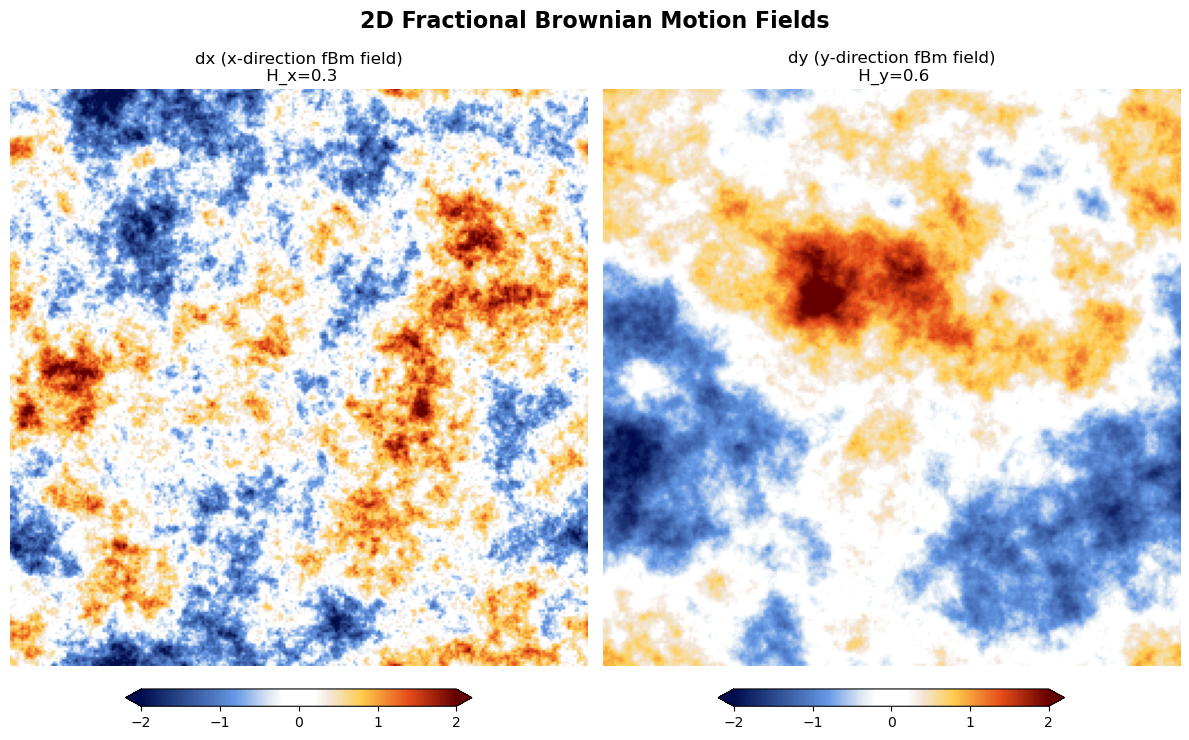

In [6]:
H_x = 0.3   # Hurst parameter for x-direction
H_y = 0.6   # Hurst parameter for y-direction

dx = generate_fbm_field_2d(size, H_x, variance=0.5) * scale_x   # x-direction fBm field
dy = generate_fbm_field_2d(size, H_y, variance=0.5) * scale_y   # y-direction fBm field

fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(dx, cmap=cmap, vmin=-2, vmax=2)
ax[0].axis('off')
ax[0].set_title(f'dx (x-direction fBm field)\n H_x={H_x}')
cbar1 = plt.colorbar(ax[0].images[0], ax=ax[0], orientation='horizontal', shrink=0.6, pad=0.02, extend='both')
ax[1].imshow(dy, cmap=cmap, vmin=-2, vmax=2)
ax[1].axis('off')
ax[1].set_title(f'dy (y-direction fBm field)\n H_y={H_y}')
cbar2 = plt.colorbar(ax[1].images[0], ax=ax[1], orientation='horizontal', shrink=0.6, pad=0.02, extend='both')
plt.suptitle('2D Fractional Brownian Motion Fields', y=0.72, fontweight='bold', fontsize=16)
plt.tight_layout()
plt.savefig(f'{fig_dir}/fBm_sim2.png', dpi=300, bbox_inches='tight', pad_inches=0.)